### Table of Contents

* [Lab | Cleaning numerical data](#Lab1)
* [Lab | Feature extraction](#Lab2)
* [Lab | Data cleaning and wrangling](#Lab3)
* [Lab | Comparing Regression Models](#Lab4)

# Lab | Cleaning numerical data  <a class="anchor" id="Lab1"></a>

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 3. First look at its main features (head, shape, info).

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [6]:
cols = []

for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ','_'))

df.columns = cols

In [7]:
#or shorter

df.columns = [columns.lower().replace(' ', '_') for columns in df.columns]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change effective to date column to datetime format.

In [8]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

### 6. Check NaN values per column.

In [9]:
#absolute
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
#percentage

df.isna().sum()/len(df)*100

#In class:
#nulls = pd.DataFrame(customer_df.isna().sum()*100/len(customer_df), columns=['percentage'])
#nulls.sort_values('percentage', ascending = False)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

### 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [11]:
#count unique values in categoricals
for col in df.select_dtypes('object'):
    print(df[col].value_counts(), '\n')

HO74982    1
GJ77362    1
WH60140    1
RJ57593    1
SG81493    1
          ..
QD69852    1
OP70207    1
LC60153    1
FS29897    1
DW72437    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

Pe

continuous variables can take any numerical value and are measured; 
discrete variables can only take certain numerical values and are counted; 
and categorical variables involve non-numeric groups or categories.

In [12]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [31]:
def define_data(df):
    uniques = []
    count_unique = 0
    continous = []
    discrete =[]
    categorical=[]
    for i in df.columns:
        if df.columns[i].select_dtypes('object'):
            categorical +=1
        #elif I wnt to count the number of uniques in the numerical columns and then assign to eith dicrete or continuous, but kind of stuck here
        #for i in range(0, len(df)):
        
        
    return categorical, continous, discrete

In [32]:
define_data(df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [13]:
data_cat = df.select_dtypes('object')
data_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 9. Get categorical features.

In [14]:
cat_features = pd.DataFrame(df.select_dtypes(np.object))
cat_features.describe()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,HO74982,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


### 10. What should we do with the customer_id column?

- setting "customer" as index as it only contains unique values


In [15]:
df['customer'].value_counts()

HO74982    1
GJ77362    1
WH60140    1
RJ57593    1
SG81493    1
          ..
QD69852    1
OP70207    1
LC60153    1
FS29897    1
DW72437    1
Name: customer, Length: 9134, dtype: int64

# Lab | Feature extraction <a class="anchor" id="Lab2"></a>


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## 1. Open the categoricals variable we created before.


In [16]:
categoricals = df.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

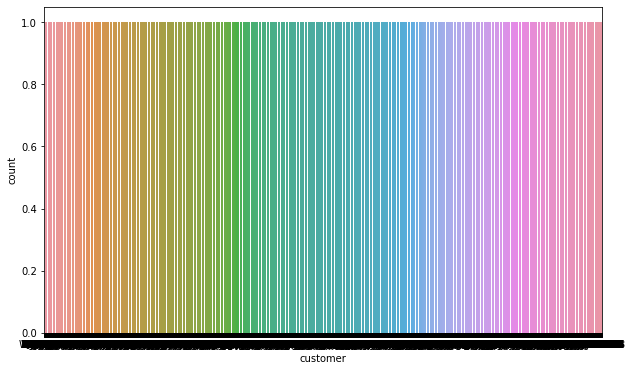

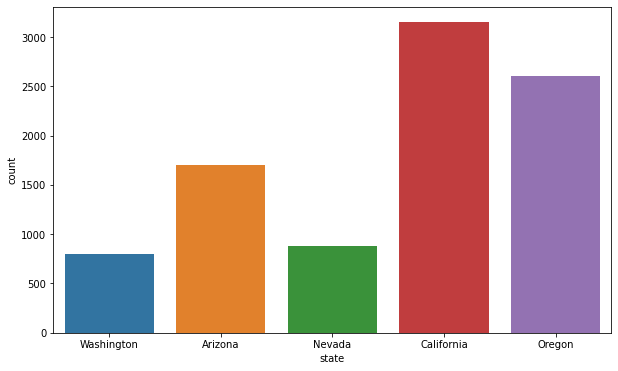

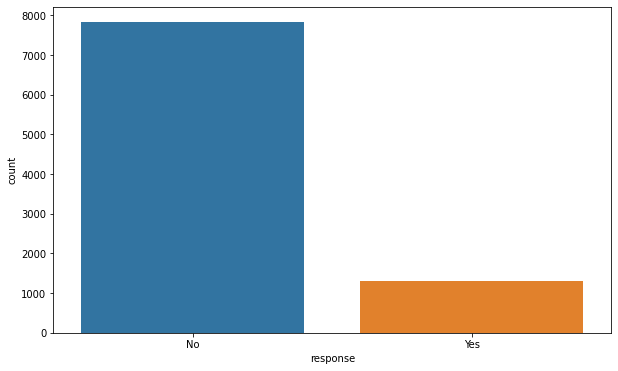

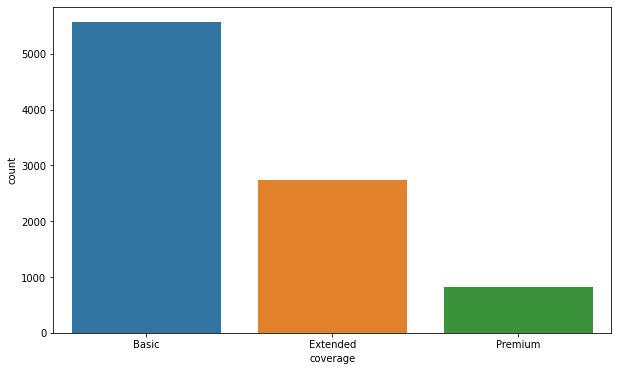

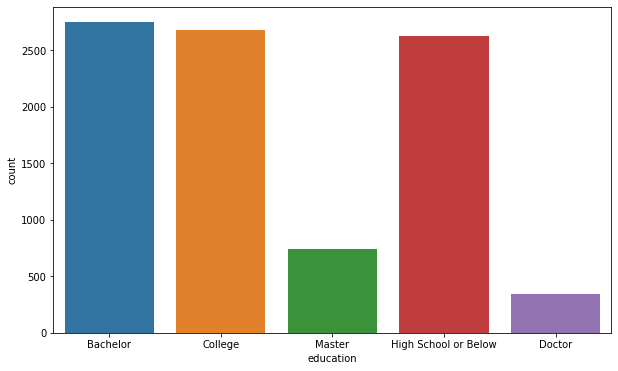

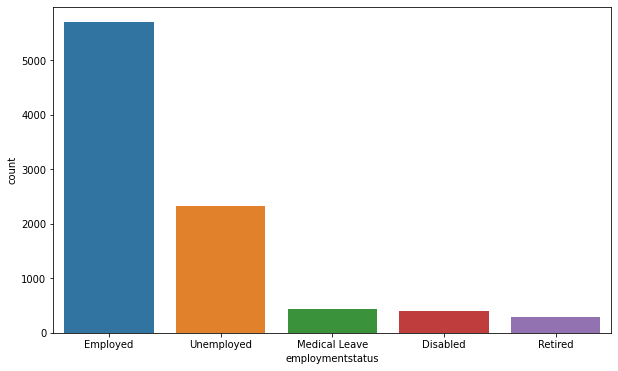

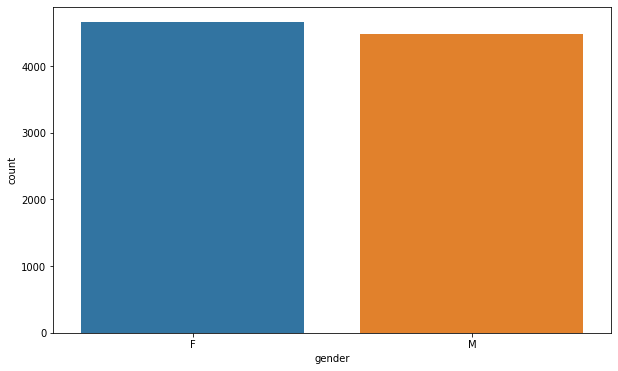

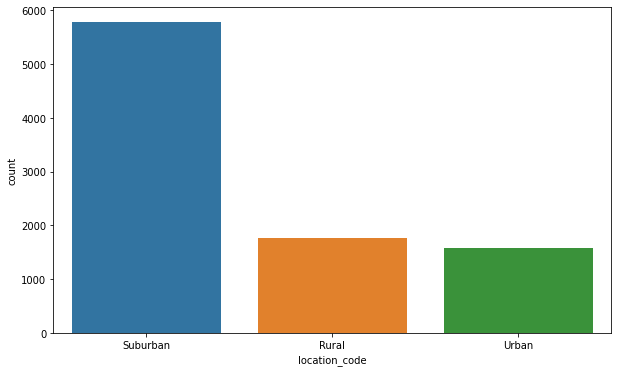

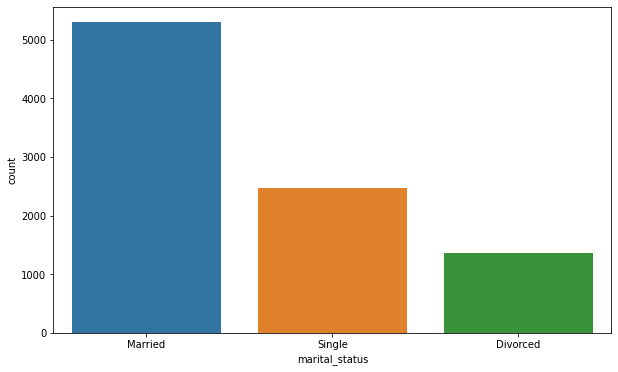

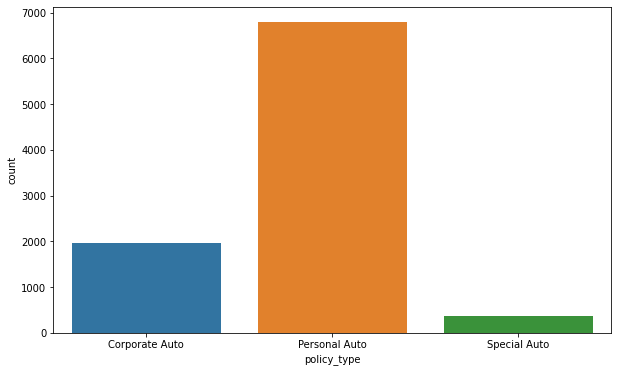

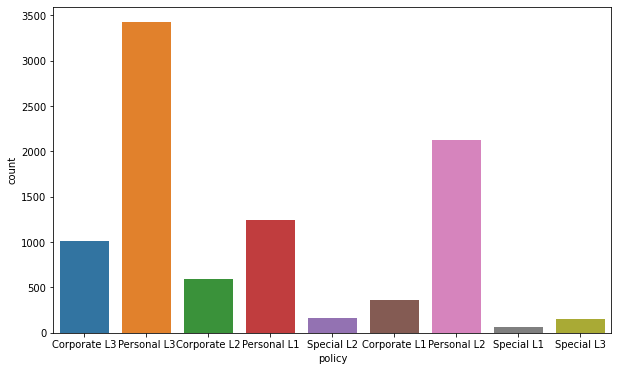

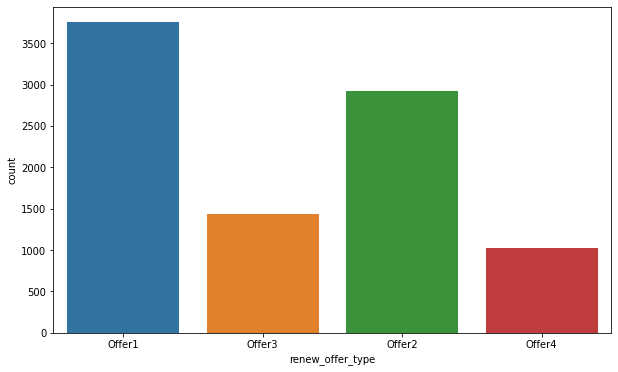

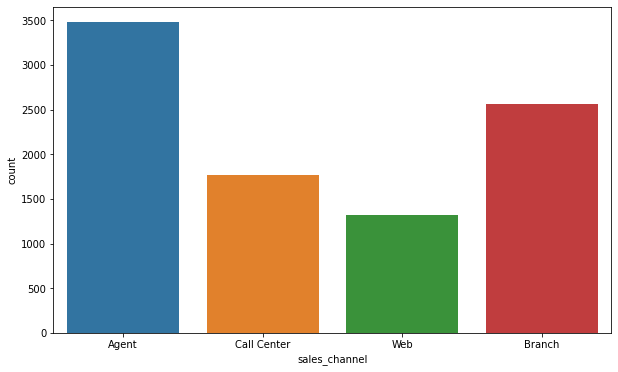

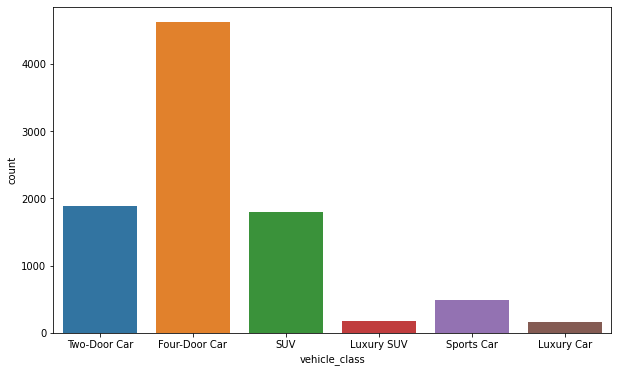

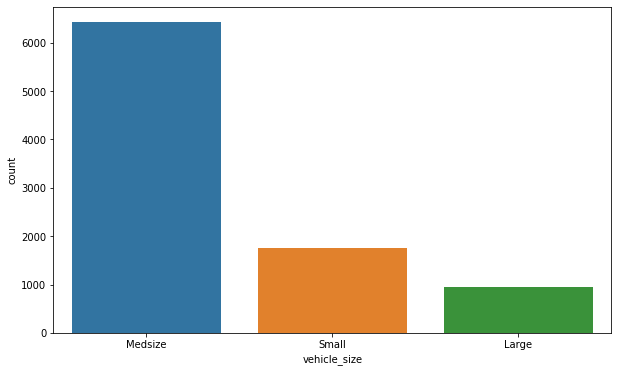

In [17]:
# countplot - code runs forever (need to drop customer column)
for column in categoricals:
    plt.figure(figsize=(10,6))
    sns.countplot(x=categoricals[column])
    plt.show()

In [ ]:
#I would like to do a pie chart that counts each value in each column: 
#for loop to run thorugh the single columns and then count the all the values, i am a bit stuck here



### -- What can you see?

Only by judging the countplots there are no significant ditributions visbible. Therefore we need to further analyse the correlations between the features.

Some observations:
- Gender: Even disribution between males and females 
- Education: Mainly HighSchool, College, and Bachelor degrees. Low count for Master and Doctoral degrees -> balance out to proceed 
- Employement status: very unbalanced - mainly employeed


Some columns could be simplyfied:
- Response: majority of values is 'no'. Might drop the columns, since it likely to predict "No" since it is skewed towards one value 
- Number of open complaints: Mainly 0, might think about deleting/grouping them as there dont state any important information, only keep values above 1
- Some columns seem similar/related, check further correlations in the next step

Vehicle Size, Married, Policy type |
Renew offer type, Sales channel



## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [ ]:
#not 100% sure what to do here. check multicorrelarity? or Chi-square tests for categorical variables?

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [42]:
vif = {}
data_corr = add_constant(categoricals) #add constant to the df categoricals
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i) #gives an error here in this line, why?
    vif[column_name] = value
    
vif

#Does multicorr check even work for categoricals or do I need get_dummies for that to work?

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## 4. Plot time variable. Can you extract something from it?

In [18]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


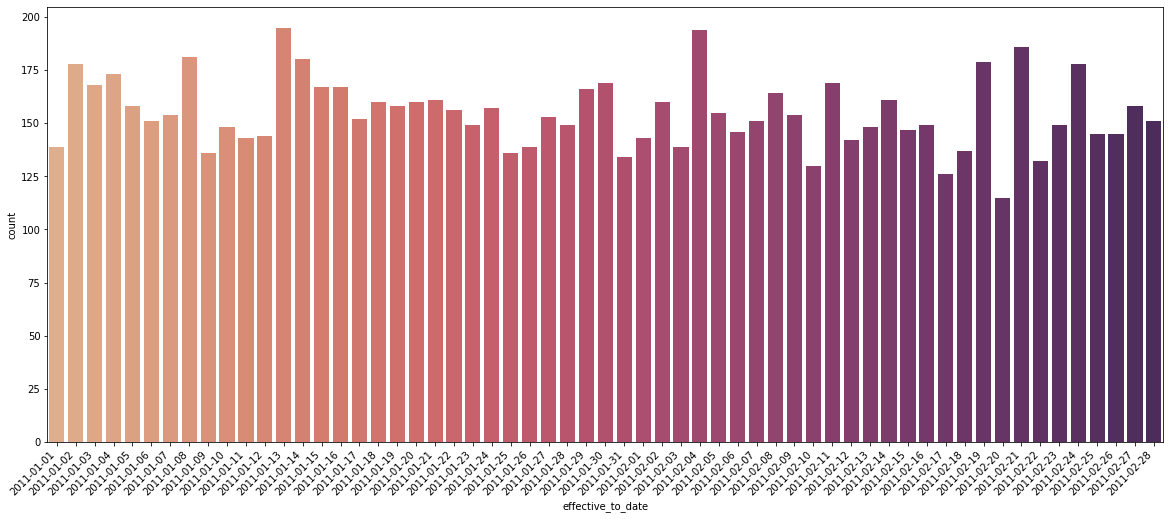

In [19]:
plt.figure(figsize=(20,8))
chart = sns.countplot(
    data=df,
    x='effective_to_date',
    palette='flare',
    #linearregression = True
)

x_dates = df['effective_to_date'].dt.strftime('%Y-%m-%d').sort_values().unique()
chart.set_xticklabels(labels=x_dates, rotation=45, ha='right')

None

# I did not figure out how to add a "trendline" here, this would be nice to see if the count are decreasing over time 
#because I think they do

# Lab | Data cleaning and wrangling <a class="anchor" id="Lab3"></a>

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

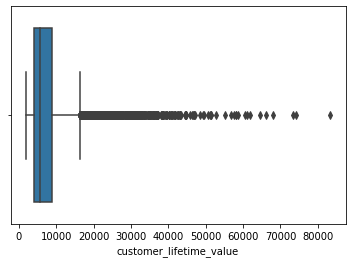

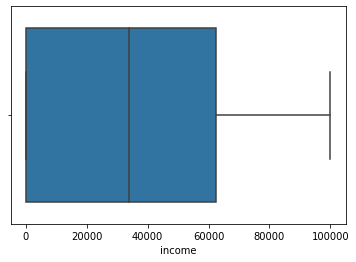

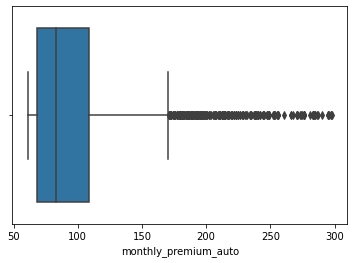

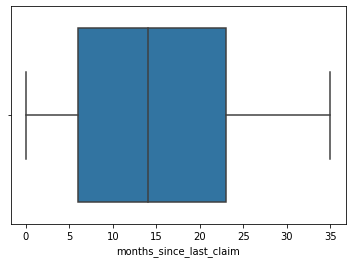

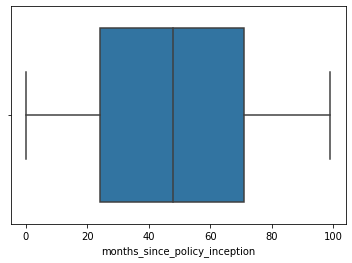

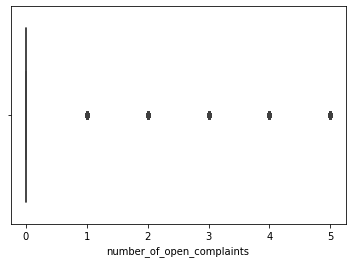

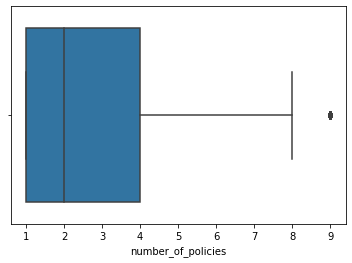

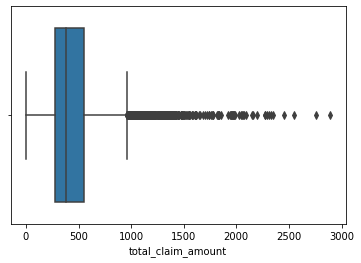

In [20]:
#look for outliers
for cols in df.select_dtypes(np.number):
    sns.boxplot(df[cols])
    plt.show()

In [21]:
#function
def remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]): #default values need to be static, otherwise it does not work
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df.loc[df[column] > upper_limit, column] = upper_limit
            df.loc[df[column] < lower_limit, column] = lower_limit
    return df

In [22]:
#execute
df = remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=['number_of_open_complaints'])


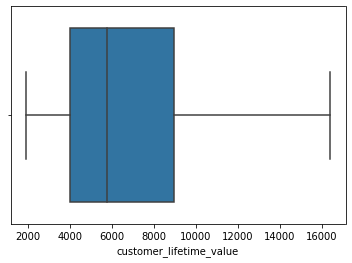

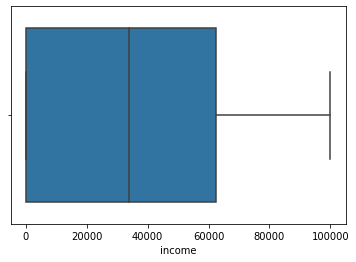

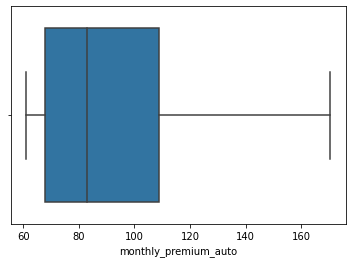

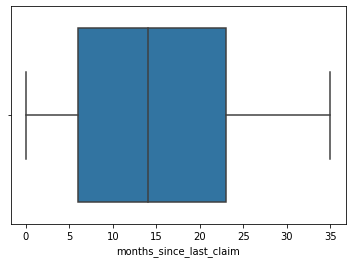

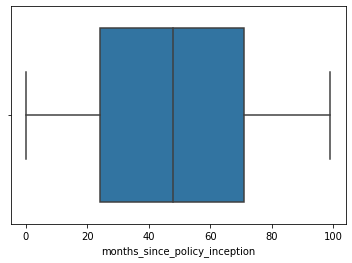

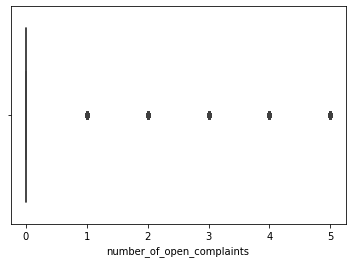

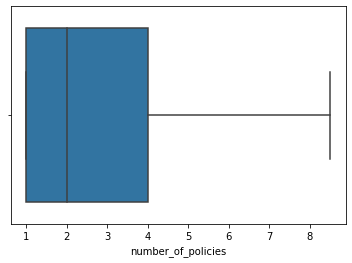

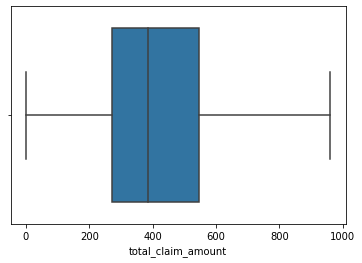

In [23]:
#check
for cols in df.select_dtypes(np.number):
    sns.boxplot(df[cols])
    plt.show()

### 2. Create a copy of the dataframe for the data wrangling.

In [24]:
df1 =df.copy()

### 3. Normalize the continuous variables. You can use any one method you want.

Options:
- Standard Scaler
- Normalization
- Min/Max Scaler

This is done after train - test split in practise.

In [25]:
numericals = df1.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,0,1.0,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0,8.0,960.399730
2,12887.431650,48767.0,108.0,18.0,38.0,0,2.0,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0,7.0,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0,1.0,138.130879


In [26]:
numerical_columns = numericals.columns
numerical_columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

##### 3.1.Standard Scaler

For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
 
Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.

You will .fit() on the training set and then .transform() both (train and test).

In [27]:
#Standard Scaler: 
from sklearn.preprocessing import StandardScaler
import pickle

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

transformer = StandardScaler()
transformer.fit(numericals)

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)
    
numericals_scaled=loaded_transformer.transform(numericals) #array

In [28]:
#convert to df
numericals_scaled = pd.DataFrame(numericals_scaled, columns = numerical_columns)
numericals_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-1.044476,0.612827,-0.791655,1.678099,-1.543287,-0.422250,-0.832582,-0.139489
1,-0.048694,-1.239617,0.088171,-0.208186,-0.217334,-0.422250,2.166327,2.256390
2,1.346693,0.365710,0.580874,0.288205,-0.360680,-0.422250,-0.404167,0.616673
3,0.108685,-1.239617,0.510488,0.288205,0.606907,-0.422250,1.737911,0.464363
4,-1.032626,0.203390,-0.650882,-0.307465,-0.145661,-0.422250,-0.832582,-1.166292
...,...,...,...,...,...,...,...,...
9129,2.179644,1.128558,-0.650882,0.288205,1.466984,-0.422250,-0.404167,-0.916110
9130,-0.965827,-0.528450,-0.439724,-0.108908,-0.719046,-0.422250,-0.832582,-0.162845
9131,0.231039,-1.239617,-0.228566,-0.605299,-0.396517,2.873245,-0.404167,1.550371
9132,0.080007,-0.517356,0.158557,1.876656,-1.614960,-0.422250,0.024249,1.135850


##### 3.2 Normalize (other option, but not executed in this lab)

For each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.

It is calculated column wise, so it takes the values of a whole row to calculate. It is wise to do the X/y split beforehand.

When using Normalizer() you might lose considerable amount of information in the dummified columns. So it might be a good idea to take the categorical columns out before scaling, and then concatenating them together again, but watch out because that too will have consequences to your model.

##### 3.3 Min/Max Scaler (other option, but not executed in this lab)

For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. It is very sensitive to the presence of outliers.

Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.

### 4. Encode the categorical variables

Options:
- Get/Dummies = OneHotEncoding
- Label Encoding
- Bucketing

Steps:
1. Copy catgoricals df for Hot encoding
2. Copy catgoricals df for Ordinal encoding
3. Merge again into one df catgoricals


**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```

In [29]:
categoricals = df.select_dtypes('object')
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


##### 4.1 One Hot Encoding

In [30]:
cat_dummies = categoricals.copy()
cat_dummies = cat_dummies.drop(['customer','coverage', 'employmentstatus', 'location_code', 'vehicle_size'], axis=1)

cat_dummies = pd.get_dummies(cat_dummies)
cat_dummies.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,education_Bachelor,education_College,education_Doctor,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


##### 4.2 Ordinal Encoding

In [31]:
cat_ordinals = categoricals.copy()
cat_ordinals = cat_ordinals.drop(['customer','response','state', 'gender', 'marital_status', 'policy_type', 'policy', 
                               'renew_offer_type', 'sales_channel', 'vehicle_class'], axis=1)

In [32]:
#choose order
for column in cat_ordinals:
    print(cat_ordinals[column].value_counts())

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64


In [33]:
#encode
cat_ordinals['coverage'] = cat_ordinals['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
cat_ordinals['education'] = cat_ordinals['education'].map({'High School or Below' : 0, 'College' : 1, 'Bachelor' : 2, 'Master' : 3, 'Doctor' : 4})
cat_ordinals['employmentstatus'] = cat_ordinals['employmentstatus'].map({'Retired' : 0, 'Disabled' : 1, 'Medical Leave' : 2, 'Unemployed' : 2, 'Employed' : 2})
cat_ordinals['location_code'] = cat_ordinals['location_code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
cat_ordinals['vehicle_size'] = cat_ordinals['vehicle_size'].map({'Small': 0, 'Medsize': 1, 'Large': 2})
cat_ordinals

,coverage,education,employmentstatus,location_code,vehicle_size
0,0,2,2,1,1
1,1,2,2,1,1
2,2,2,2,1,1
3,0,2,2,1,1
4,0,2,2,0,1
...,...,...,...,...,...
9129,0,2,2,2,1
9130,1,1,2,1,1
9131,1,2,2,1,1
9132,1,1,2,1,2


##### 4.3 Concat both categorical encoded dataframes

In [34]:
categoricals_encoded = pd.concat([cat_dummies, cat_ordinals], axis=1)
categoricals_encoded

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,education_Bachelor,education_College,education_Doctor,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,education,employmentstatus,location_code,vehicle_size
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,2,2,1,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,2,2,1,1
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,2,2,2,1,1
3,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,2,2,1,1
4,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,2,2,2,1
9130,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,2,1,1
9131,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,2,2,1,1
9132,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,2,1,2


### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [35]:
df1['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [36]:
#Has been transformed into data format before in this notebook and copied into df1:
df1['effective_to_date'] = pd.to_datetime(df1['effective_to_date']) 

df1['day'] = df1['effective_to_date'].dt.day
df1['week'] = df1['effective_to_date'].dt.week
df1['month'] = df1['effective_to_date'].dt.month

#save into seperat dataframe to merge afterwards
dates = pd.DataFrame(df1[["day","week","month"]])
dates

,day,week,month
0,24,8,2
1,31,5,1
2,19,7,2
3,20,3,1
4,3,5,2
...,...,...,...
9129,10,6,2
9130,12,6,2
9131,6,5,2
9132,3,5,2


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [37]:
data_for_model = pd.concat([numericals_scaled, categoricals_encoded, dates], axis=1)
data_for_model.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,education,employmentstatus,location_code,vehicle_size,day,week,month
0,-1.044476,0.612827,-0.791655,1.678099,-1.543287,-0.42225,-0.832582,-0.139489,0,0,...,0,1,0,2,2,1,1,24,8,2
1,-0.048694,-1.239617,0.088171,-0.208186,-0.217334,-0.42225,2.166327,2.256390,1,0,...,0,0,1,2,2,1,1,31,5,1
2,1.346693,0.365710,0.580874,0.288205,-0.360680,-0.42225,-0.404167,0.616673,0,0,...,0,1,2,2,2,1,1,19,7,2
3,0.108685,-1.239617,0.510488,0.288205,0.606907,-0.42225,1.737911,0.464363,0,1,...,0,0,0,2,2,1,1,20,3,1
4,-1.032626,0.203390,-0.650882,-0.307465,-0.145661,-0.42225,-0.832582,-1.166292,0,0,...,0,0,0,2,2,0,1,3,5,2


In [63]:
#check data types
data_for_model.dtypes

customer_lifetime_value           float64
income                            float64
monthly_premium_auto              float64
months_since_last_claim           float64
months_since_policy_inception     float64
number_of_open_complaints         float64
number_of_policies                float64
total_claim_amount                float64
state_Arizona                       uint8
state_California                    uint8
state_Nevada                        uint8
state_Oregon                        uint8
state_Washington                    uint8
response_No                         uint8
response_Yes                        uint8
education_Bachelor                  uint8
education_College                   uint8
education_Doctor                    uint8
education_High School or Below      uint8
education_Master                    uint8
gender_F                            uint8
gender_M                            uint8
marital_status_Divorced             uint8
marital_status_Married            

All numericals!

# Lab | Comparing regression models <a class="anchor" id="Lab4"></a>

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [39]:
from sklearn.model_selection import train_test_split

X = data_for_model.drop(['total_claim_amount'], axis=1)
y = data_for_model['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)


### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [40]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [41]:
lreg.score(X_test, y_test)

0.5844529630782305

In [61]:
#other measures discussed in class
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
predictions = lreg.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions)

(0.5844529630782305, 0.49775431715635843, 0.41316070517564224)

### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [52]:
def apply_models (models=[]):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)
        model.fit(X_train, y_train)
        R2score = model.score(X_test, y_test)
        print(model,":",R2score)
#Would it make sense also to put in the import statements for some models?

### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [53]:
#import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [58]:
#check for appropriate k value
scores = []
for i in range(2,15):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

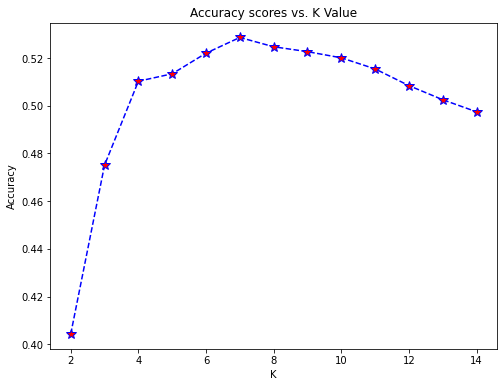

In [59]:
plt.figure(figsize=(8,6))
plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
         marker='*', markerfacecolor='red', markersize=10)
plt.title('Accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Achieved highest accuracy with k-value of 7

In [60]:
apply_models([LinearRegression(), KNeighborsRegressor(n_neighbors=7)])

LinearRegression() : 0.5844529630782305
KNeighborsRegressor(n_neighbors=7) : 0.5286036679984643


### 5. You can check also the MLPRegressor for this task!


In [62]:
from sklearn.neural_network import MLPRegressor
apply_models([MLPRegressor()])

MLPRegressor() : 0.8097363339897496


### 6. Check and discuss the results.

Highest Score achieved with MLPRegressor: 0.8097, followed by LinearRegression: 0.5844529630782305 &
KNeighborsRegressor(n_neighbors=7): 0.5286036679984643

- normally scaling after train test split